In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

/home/vinicius/.local/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.stats import gaussian_kde


# Preparando dados

In [94]:
DATA_PATH = "./data"
FILE_NAME = "stackoverflow.csv"

In [95]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(f"{DATA_PATH}/{FILE_NAME}")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [20]:
# from math import isnan

TOP10_COUNTRIES = ["United States of America", "Germany", "India", "United Kingdom of Great Britain and Northern Ireland", "Canada", "France", "Poland", "Netherlands", "Australia", "Brazil", "Italy", "Spain", "Sweden", "Switzerland", "Russian Federation", "Austria", "Israel", "Belgium", "Turkey", "Ukraine", "Denmark", "Romania", "Portugal", "Norway", "Finland", "New Zealand", "China", "Greece"]
PODER_DE_COMPRA_CONVERSAO = {
    "United States of America": (1, 139.7),
    "Germany": (0.7, 131.9),
    "India": (20.22, 216.9),
    "United Kingdom of Great Britain and Northern Ireland": (0.67, 142.7),
    "Canada": (1.17, 134.9),
    "France": (0.67, 124),
    "Poland": (1.88, 158.2),
    "Netherlands": (0.74, 137.7),
    "Australia": (1.39, 139.9),
    "Brazil": (2.44, 213.9),
    "Italy": (0.60, 128.6),
    "Spain": (0.57, 128.0),
    "Sweden": (8.51, 133.5),
    "Switzerland": (0.97, 104.4),
    "Russian Federation": (26.68, 199.4),
    "Austria": (0.71, 143.9),
    "Israel": (3.59, 118.8),
    "Belgium": (0.70, 137.8),
    "Turkey": (6.97, 834.6),
    "Ukraine": (10.52, 429.2),
    "Denmark": (6.11, 125.6),
    "Romania": (1.76, 167.7),
    "Portugal": (0.52, 126.0),
    "Norway": (8.89, 140.7),
    "Finland": (0.76, 131.0),
    "New Zealand": (1.46, 136.9),
    "China": (3.64, 132.2),
    "Greece": (0.52, 115.6)
}

def obtem_poder_de_compra(row):
    vars = PODER_DE_COMPRA_CONVERSAO[row["Country"]]
    return (row["ConvertedCompYearly"] * vars[1]) / (vars[0] * 100)

def concatena_stacks(row):
    lang = row["LanguageHaveWorkedWith"]
    db = row["DatabaseHaveWorkedWith"]
    platform = row["PlatformHaveWorkedWith"]
    misc = row["MiscTechHaveWorkedWith"]
    
    languages = np.char.split("" if pd.isnull(lang) else lang, sep=';').tolist()
    # dbs = np.char.split("" if pd.isnull(db) else db, sep=';').tolist()
    # platforms = np.char.split("" if pd.isnull(platform) else platform, sep=';').tolist()
    # miscs = np.char.split("" if pd.isnull(misc) else misc, sep=';').tolist()
    
    # concatenated = languages + dbs + platforms + miscs
    concatenated = languages
    filtered = filter(lambda item: item != "", concatenated)

    return list(filtered)

# 
top10_df = df[df["Country"].isin(TOP10_COUNTRIES)]
top10_df = top10_df[["Country", "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", "MiscTechHaveWorkedWith", "ConvertedCompYearly"]]
top10_df = top10_df.dropna(subset=["ConvertedCompYearly"])
top10_df["poder_de_compra"] = top10_df.apply(obtem_poder_de_compra,axis=1)
corr_df["stacks"] = top10_df.apply(concatena_stacks, axis=1)
top10_df = top10_df[top10_df["poder_de_compra"] < 1000000]
top10_df[["poder_de_compra", "stacks"]]

,poder_de_compra,stacks
1,398145.000000,"[HTML/CSS, JavaScript, Python]"
2,349250.000000,"[Bash/Shell (all shells), Go]"
3,217932.000000,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."
5,206229.188060,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."
6,188595.000000,"[Ada, Clojure, Elixir, Go, HTML/CSS, Java, Jav..."
...,...,...
89158,8311.355464,[TypeScript]
89162,44462.270902,"[C, C++]"
89167,1689.717507,"[Dart, HTML/CSS, JavaScript, TypeScript]"
89170,118917.850746,"[C#, F#, HTML/CSS, JavaScript, SQL, TypeScript]"


<AxesSubplot:>

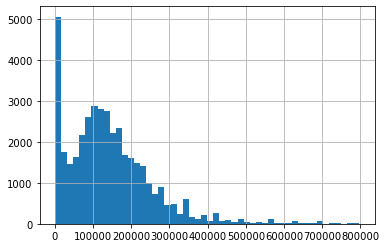

In [21]:
top10_df["poder_de_compra"].hist(bins=50)

<AxesSubplot:>

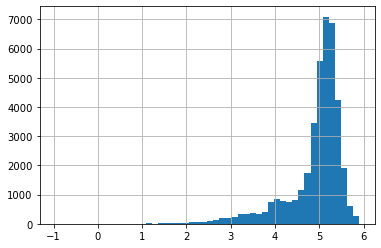

In [42]:
top10_df["log_poder_compra"] = np.log10(top10_df["poder_de_compra"])  
top10_df["log_poder_compra"].hist(bins=50)

# Frequent Pattern

In [5]:
def isthereempty(stack):
    return stack == ""

# top10_df["stacks"].filter(lambda stacks: len(filter(isthereempty, stacks)) != 0, axis=1)
filtered_df = top10_df[top10_df['stacks'].apply(lambda stacks: any(isthereempty(stack) for stack in stacks))]
filtered_df

,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ConvertedCompYearly,poder_de_compra,stacks


<AxesSubplot:>

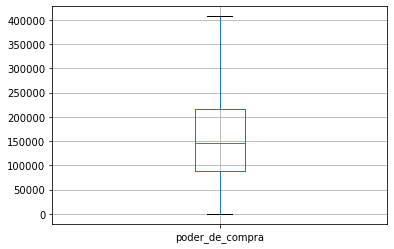

In [6]:
top10_df.boxplot(column="poder_de_compra", showfliers=False)

In [7]:
threshold_25 = top10_df["poder_de_compra"].quantile(0.25)
threshold_50 = top10_df["poder_de_compra"].quantile(0.5)
threshold_75 = top10_df["poder_de_compra"].quantile(0.75)
threshold_25, threshold_50, threshold_75

(89187.46268656716, 145417.6895522388, 216535.0)

In [8]:
df_25 = top10_df[top10_df["poder_de_compra"] <= threshold_25]
df_50 = top10_df[(top10_df["poder_de_compra"] > threshold_25) & (top10_df["poder_de_compra"] <= threshold_50)]
df_75 = top10_df[(top10_df["poder_de_compra"] > threshold_50) & (top10_df["poder_de_compra"] <= threshold_75)]
df_100 = top10_df[top10_df["poder_de_compra"] > threshold_75]
df_list = {"25":df_25,"50":df_50,"75": df_75, "100": df_100}

#### Registrando

In [9]:
# unique_elements =  np.unique(top10_df["stacks"])
unique_elements  = top10_df["stacks"].explode().unique()
unique_elements.shape

(143,)

In [10]:
STACKS_LEN = unique_elements.shape[0]

final_map = {}
size = 1

for i in range(STACKS_LEN):
    final_map[unique_elements[i]] = size
    size += 1

final_map

{'HTML/CSS': 1,
 'JavaScript': 2,
 'Python': 3,
 'Supabase': 4,
 'Amazon Web Services (AWS)': 5,
 'Netlify': 6,
 'Vercel': 7,
 'Electron': 8,
 'React Native': 9,
 'Tauri': 10,
 'Bash/Shell (all shells)': 11,
 'Go': 12,
 'Google Cloud': 13,
 'OpenStack': 14,
 'VMware': 15,
 'Vultr': 16,
 'PHP': 17,
 'Ruby': 18,
 'SQL': 19,
 'TypeScript': 20,
 'PostgreSQL': 21,
 'Redis': 22,
 'Cloudflare': 23,
 'Heroku': 24,
 'BigQuery': 25,
 'Cloud Firestore': 26,
 'Ada': 27,
 'Clojure': 28,
 'Elixir': 29,
 'Java': 30,
 'Lisp': 31,
 'OCaml': 32,
 'Raku': 33,
 'Scala': 34,
 'Swift': 35,
 'Zig': 36,
 'MariaDB': 37,
 'Microsoft SQL Server': 38,
 'MySQL': 39,
 'SQLite': 40,
 'Digital Ocean': 41,
 'RabbitMQ': 42,
 'Spring Framework': 43,
 'Rust': 44,
 'Dynamodb': 45,
 'MongoDB': 46,
 'Fly.io': 47,
 'NumPy': 48,
 'Pandas': 49,
 'Scikit-Learn': 50,
 'TensorFlow': 51,
 'C#': 52,
 'Kotlin': 53,
 'PowerShell': 54,
 'Cosmos DB': 55,
 'Microsoft Azure': 56,
 '.NET (5+) ': 57,
 'Solidity': 58,
 'Elasticsearch': 59,


In [11]:
OUTPUT_PATH = "./out/stackoverflow"
FILE_NAME = "stacks"

In [13]:
import subprocess

for quartile, df in df_list.items():
    casted_file = f"{OUTPUT_PATH}/{FILE_NAME}_{quartile}.txt"
    with open(casted_file, 'w') as file:
        file.write("@CONVERTED_FROM_TEXT\n")
        # Header
        for (key, item) in final_map.items():
            file.write(f"@ITEM={item}={key},\n")
        # Sequences
        for row in df.itertuples():
            casted_items = map(lambda x: str(final_map[x]), row.stacks)
            file.write(f"{' '.join(casted_items)}\n")
    
        subprocess.run(["java", "-jar", "./HighUtilityItemsetMining/spmf.jar", "run", "FPGrowth_itemsets", f"{casted_file}",  f"{OUTPUT_PATH}/output_{quartile}.txt","20%"])

>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7399
 Max memory usage: 13.266372680664062 mb 
 Frequent itemsets count : 50
 Total time ~ 161 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7560
 Max memory usage: 12.695526123046875 mb 
 Frequent itemsets count : 52
 Total time ~ 179 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7411
 Max memory usage: 12.9423828125 mb 
 Frequent itemsets count : 58
 Total time ~ 160 ms
Post-processing to show result in terms of string values.
Post-processing completed.


# Subgroup Discovery

In [22]:
df.sample(2)
# YearsCodePro

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,stacks
21770,21771,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,NaN,11,6,"Developer, full-stack","10,000 or more employees",I have little or no influence,NaN,Start a free trial;Visit developer communities...,South Africa,ZAR\tSouth African rand,936000.0,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,NaN,MariaDB;Microsoft SQL Server;MongoDB;MySQL;Pos...,NaN,Amazon Web Services (AWS);Digital Ocean;Fly.io...,NaN,Angular;Express;Lit;NestJS;Next.js;Node.js;Rea...,NaN,Ionic;RabbitMQ;React Native,NaN,Gradle;Homebrew;npm;pnpm;Wasmer;Webpack;Yarn,NaN,Nano;Visual Studio Code,NaN,MacOS;Ubuntu;Windows;Windows Subsystem for Lin...,NaN,Jira;Markdown File;Miro;Monday.com,NaN,Google Meet;Microsoft Teams;Slack;Zoom,NaN,Bing AI;ChatGPT,NaN,GitHub Copilot,NaN,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Less than once per month or monthly,"Yes, somewhat","That would be great, I think it will help orga...",Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Highly trust,NaN,Writing code;Documenting code;Debugging and ge...,Learning about a codebase;Project planning;Tes...,NaN,NaN,NaN,Writing code;Documenting code;Debugging and ge...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,48552.0,NaN
42823,42824,I agree,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Written Tutorials;Stack Overflow,NaN,32,30,"Developer, mobile",I don’t know,I have little or no influence,NaN,Ask developers I know/work with;Visit develope...,United States of America,USD\tUnited States dollar,NaN,Java;Kotlin;Objective-C;Swift,Kotlin;Swift,Firebase Realtime Database;SQLite,Firebase Realtime Database,Amazon Web Services (AWS);Firebase;Google Cloud,Amazon Web Services (AWS);Firebase,NaN,NaN,Flutter,Flutter,Gradle,Gradle,Android Studio;IntelliJ IDEA;Visual Studio Cod...,Android Studio;Xcode,Android;iOS;MacOS,Android;iOS;MacOS,Jira,Jira,Google Meet;Microsoft Teams;Ringcentral;Signal...,Signal,ChatGPT;Google Bard AI,NaN,NaN,NaN,Stack Overflow,Daily or almost daily,Yes,Less than once per month or monthly,"Yes, somewhat",They are useful. Shouldn't be used for anythin...,"No, but I plan to soon",Favorable,NaN,Somewhat distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,30.0

In [23]:
dev_df = df[["DevType"]]
dev_df = dev_df.dropna()
dev_df.sample(10)

,DevType
54143,"Developer, back-end"
69439,Cloud infrastructure engineer
62809,"Developer, desktop or enterprise applications"
6787,"Engineer, data"
41103,"Developer, mobile"
21615,"Developer, full-stack"
42739,"Developer, back-end"
9006,"Developer, back-end"
48208,Research & Development role
63852,Product manager


In [24]:
def get_raw_dev_type(row):
    raw = row["DevType"]
    return raw.replace('Developer, ', '')

type_df = dev_df[dev_df["DevType"].str.startswith("Developer")]
type_df = type_df.apply(get_raw_dev_type, axis=1)
type_df.unique(), type_df.unique().__len__()

(array(['back-end', 'front-end', 'full-stack',
        'desktop or enterprise applications', 'QA or test', 'mobile',
        'embedded applications or devices', 'game or graphics',
        'Developer Experience', 'Developer Advocate'], dtype=object),
 10)

In [43]:
df["stacks"] = top10_df.apply(concatena_stacks, axis=1)
unique_stacks = df["stacks"].explode().unique()
unique_stacks, unique_stacks.shape

(array([nan, 'HTML/CSS', 'JavaScript', 'Python', 'Bash/Shell (all shells)',
        'Go', 'PHP', 'Ruby', 'SQL', 'TypeScript', 'Ada', 'Clojure',
        'Elixir', 'Java', 'Lisp', 'OCaml', 'Raku', 'Scala', 'Swift', 'Zig',
        'Rust', 'C#', 'PowerShell', 'Kotlin', 'Solidity', 'C', 'C++',
        'Perl', 'Dart', 'Haskell', 'Delphi', 'Lua', 'VBA',
        'Visual Basic (.Net)', 'Groovy', 'GDScript', 'F#', 'R',
        'Objective-C', 'APL', 'Assembly', 'Cobol', 'Fortran', 'Julia',
        'MATLAB', 'Prolog', 'Apex', 'Crystal', 'SAS', 'Erlang', 'Nim',
        'Flow'], dtype=object),
 (52,))

(array(['Senior-Executive-(C-Suite-VP-etc.)', 'back-end', 'front-end',
        'QA or test', 'full-stack', 'Security-professional',
        'desktop or enterprise applications', 'System-administrator',
        'Data-or-business-analyst', 'Other-(please-specify):', 'mobile',
        'Cloud-infrastructure-engineer', 'Research-&-Development-role',
        'Engineering-manager', 'Developer Experience',
        'Data-scientist-or-machine-learning-specialist', 'data-engineer',
        'Academic-researcher', 'Developer Advocate', 'DevOps-specialist',
        'embedded applications or devices', 'Engineer-site-reliability',
        'Blockchain', 'Product-manager', 'Educator', 'Project-manager',
        'game or graphics', 'Hardware-Engineer',
        'Marketing-or-sales-professional', 'Database-administrator',
        'Scientist'], dtype=object),
 (9946,))

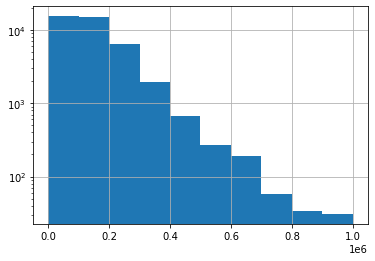

In [89]:
DEV_TYPE_BLACK_LIST = ["Student", "Designer"]

def cast_dev_type(row):
    _type = row["DevType"]
    if _type.startswith("Developer"):
        return get_raw_dev_type(row)
    if  _type == "Engineer, data":
        return "data-engineer"
    _type = _type.replace(' ', '-')
    _type = _type.replace(',', '')
    return _type

scaler = StandardScaler()
# TODO

type10_df = df[df["Country"].isin(TOP10_COUNTRIES)]
type10_df = type10_df.dropna(subset=["ConvertedCompYearly", "DevType"])
type10_df["poder_de_compra"] = type10_df.apply(obtem_poder_de_compra,axis=1)
type10_df = type10_df[type10_df["poder_de_compra"] < 1000000]

type10_df["poder_de_compra"].hist(log=True)
quantile = type10_df["poder_de_compra"].quantile(0.75)
type10_df = type10_df[type10_df["poder_de_compra"] > quantile]
type10_df["poder_de_compra"] = scaler.fit_transform(type10_df[["poder_de_compra"]])
type10_df["FinalDevType"] = type10_df.apply(cast_dev_type, axis=1)
type10_df = type10_df[~type10_df["FinalDevType"].isin(DEV_TYPE_BLACK_LIST)]
type10_df = type10_df[["poder_de_compra", "FinalDevType", "stacks"]]
type10_df["FinalDevType"].unique(), type10_df["FinalDevType"].shape

In [90]:
df_exploded = type10_df.explode(column='stacks')
df_one_hot = pd.get_dummies(df_exploded, columns=['stacks'])
df_one_hot = df_one_hot.groupby(level=0).sum()
merged_df = df_one_hot.join(type10_df, how="left", lsuffix='_left', rsuffix='_right')
merged_df = merged_df.drop(columns=['stacks', 'poder_de_compra_left'])

/tmp/ipykernel_2144/1987678396.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_one_hot = df_one_hot.groupby(level=0).sum()


In [91]:
TYPE_OUTPUT_PATH = "./out/type.csv"

merged_df.to_csv(TYPE_OUTPUT_PATH, index=False)

In [29]:
merged_df["poder_de_compra_right"].describe()

count    39881.000000
mean         0.000127
std          1.001221
min         -0.252298
25%         -0.144677
50%         -0.044887
75%          0.074658
max        141.166972
Name: poder_de_compra_right, dtype: float64

In [48]:
merged_df

,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,poder_de_compra_right,FinalDevType
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.404504,Senior-Executive-(C-Suite-VP-etc.)
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.323844,back-end
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0.107215,front-end
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0.087909,back-end
6,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0.058819,full-stack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.238587,front-end
89162,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.178951,back-end
89167,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.249511,mobile
89170,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,-0.056125,Other-(please-specify):


<AxesSubplot:>

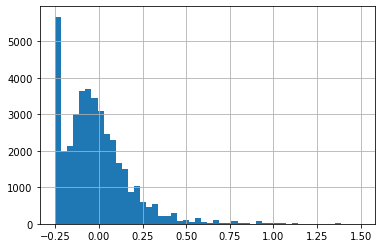

In [36]:
merged_df[merged_df["poder_de_compra_right"] < 1.5]["poder_de_compra_right"].hist(bins=50)

/tmp/ipykernel_2144/2132862342.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(merged_df["poder_de_compra_right"], shade=True)


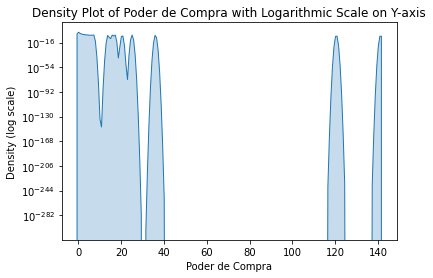

In [40]:
ax = sns.kdeplot(merged_df["poder_de_compra_right"], shade=True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('Poder de Compra')
plt.ylabel('Density (log scale)')
plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

# Show the plot
plt.show()

### Outras q tao errada

In [33]:
def plot_density_type(type, in_df):
    aaa_df = in_df[in_df["FinalDevType"] == type]
    sns.kdeplot(aaa_df["poder_de_compra"], shade=True)
    
def plot_log_density_type(type, in_df):
    aaa_df = in_df[in_df["FinalDevType"] == type]
    ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)
    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

    # Add labels and title
    plt.xlabel('Poder de Compra')
    plt.ylabel('Density (log scale)')
    plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

    # Show the plot
    plt.show()

<AxesSubplot:>

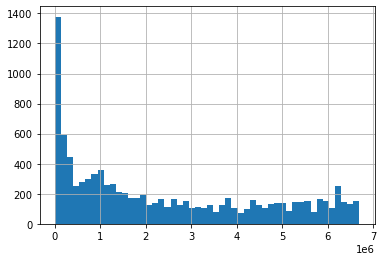

In [74]:
merged_df["poder_pos"] = np.power(merged_df["poder_de_compra_right"], 10)
merged_df[merged_df["poder_pos"] < 60000000]["poder_pos"].hist(bins=50)

In [75]:
res_df = merged_df[ (merged_df["stacks_Bash/Shell (all shells)"] == 1) & (merged_df["stacks_Dart"] == 0) & (merged_df["stacks_Apex"] == 0) & (merged_df["stacks_R"] == 0) & (merged_df["stacks_Crystal"] == 0) & (merged_df["stacks_OCaml"] == 0) & (merged_df["stacks_Visual Basic (.Net)"] == 0)]

<AxesSubplot:>

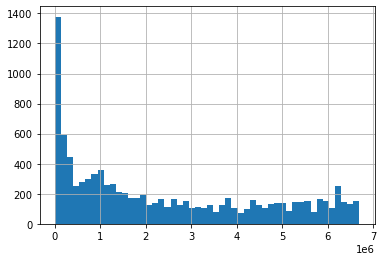

In [76]:
merged_df["poder_pos"].hist(bins=50)

In [79]:
merged_df["poder_pos"].describe()

count    9.970000e+03
mean     2.394832e+06
std      2.138520e+06
min      1.101086e-15
25%      4.373502e+05
50%      1.699799e+06
75%      4.287933e+06
max      6.690877e+06
Name: poder_pos, dtype: float64

<AxesSubplot:>

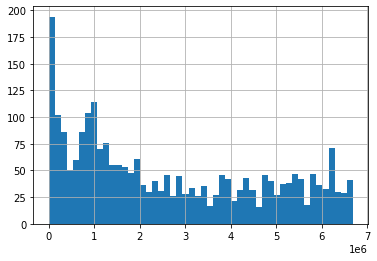

In [77]:
res_df["poder_pos"].hist(bins=50)

In [78]:
res_df["poder_pos"].describe()

count    2.449000e+03
mean     2.644070e+06
std      2.084720e+06
min      3.253941e-01
25%      8.576930e+05
50%      2.055844e+06
75%      4.506779e+06
max      6.687949e+06
Name: poder_pos, dtype: float64

/tmp/ipykernel_2478/1800307463.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(type10_df["poder_de_compra"], shade=True)


<AxesSubplot:xlabel='poder_de_compra', ylabel='Density'>

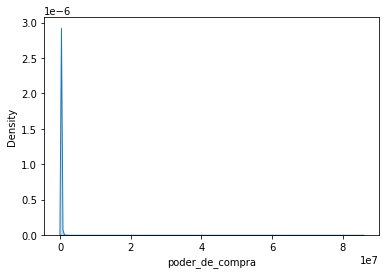

In [38]:
sns.kdeplot(type10_df["poder_de_compra"], shade=True)

/tmp/ipykernel_2478/2773101024.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(type10_df["poder_de_compra"], shade=True)


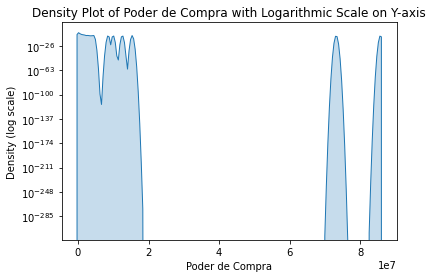

In [30]:
ax = sns.kdeplot(type10_df["poder_de_compra"], shade=True)
 # Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('Poder de Compra')
plt.ylabel('Density (log scale)')
plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

# Show the plot
plt.show()

/tmp/ipykernel_2478/230169858.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


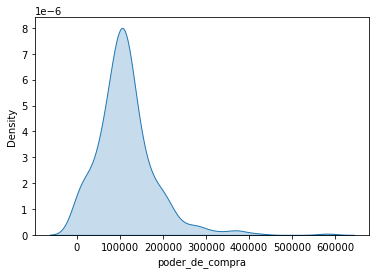

In [35]:
plot_density_type("Academic-researcher", type10_df)

/tmp/ipykernel_2478/3541173781.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


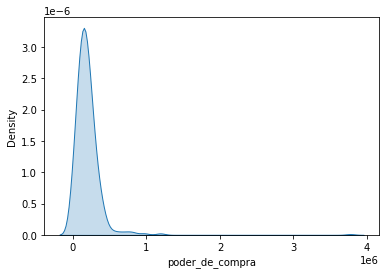

In [41]:
plot_density_type("Research-&-Development-role", type10_df)

/tmp/ipykernel_2478/3541173781.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


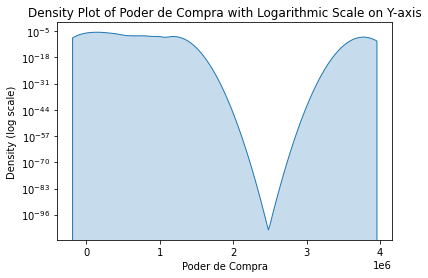

In [40]:
plot_log_density_type("Research-&-Development-role", type10_df)

In [43]:
type10_df[type10_df["poder_de_compra"] >= 2790000]

,poder_de_compra,FinalDevType
770,1.257300e+07,Data-scientist-or-machine-learning-specialist
5904,2.794000e+06,Other-(please-specify):
16666,3.352800e+06,Other-(please-specify):
25204,2.908354e+06,Senior-Executive-(C-Suite-VP-etc.)
32596,4.494728e+06,back-end
34996,8.572656e+06,full-stack
47797,9.979787e+06,full-stack
51182,3.771900e+06,Research-&-Development-role
53268,8.572657e+07,full-stack
56804,3.075907e+06,Engineer-site-reliability


/tmp/ipykernel_2478/3541173781.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


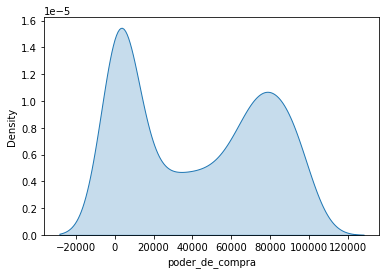

In [50]:
plot_density_type("front-end", type10_df[type10_df["poder_de_compra"] < 100000])

/tmp/ipykernel_2478/3541173781.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


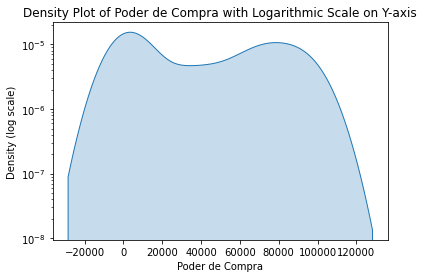

In [51]:
plot_log_density_type("front-end", type10_df[type10_df["poder_de_compra"] < 100000])

### 18/07/24 -  Resultados

In [125]:
def cleaned_conds(row):
    conds = row['Conditions'].split('AND')
    trimmed = list(map(lambda cond: cond.strip(), conds))
    ones = [item for item in trimmed if '0' not in item]
    if ones is None or ones.__len__() == 0:
        return None
    ones.sort()
    return " AND ".join(ones)

res_df = pd.read_csv("./out/30country_beam200_bin18_min100_<.csv", '\t')
res_df['filtered_conds'] = res_df.apply(cleaned_conds, axis =1)
res_df = res_df.dropna(subset=["filtered_conds"])
res_df

/tmp/ipykernel_1613/707939748.py:10: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  res_df = pd.read_csv("./out/30country_beam200_bin18_min100_<.csv", '\t')


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions,filtered_conds
0,1,4,217,18.348469,1.247210,12.541905,NaN,stacks_HTML/CSS = '1' AND stacks_Swift = '1' A...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
1,2,4,217,18.348469,1.247210,12.541905,NaN,stacks_Swift = '1' AND stacks_HTML/CSS = '1' A...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
2,3,4,217,18.348469,1.247210,12.541905,NaN,stacks_Swift = '1' AND stacks_TypeScript = '0'...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
3,4,4,217,18.348469,1.247210,12.541905,NaN,stacks_TypeScript = '0' AND stacks_Swift = '1'...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
4,5,4,231,17.981907,1.184682,12.164932,NaN,stacks_HTML/CSS = '1' AND stacks_Swift = '1' A...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
...,...,...,...,...,...,...,...,...,...
22392,22393,2,431,1.001589,0.048430,0.310187,NaN,stacks_Swift = '0' AND stacks_Erlang = '1',stacks_Erlang = '1'
22393,22394,2,177,1.001201,0.075473,0.356165,NaN,stacks_Swift = '0' AND FinalDevType = 'Product...,FinalDevType = 'Product-manager'
22394,22395,2,177,1.001201,0.075473,0.356165,NaN,FinalDevType = 'Product-manager' AND stacks_Sw...,FinalDevType = 'Product-manager'
22395,22396,3,126,1.000830,0.089396,0.363836,NaN,stacks_Perl = '0' AND stacks_Swift = '1' AND F...,FinalDevType = 'back-end' AND stacks_Swift = '1'


In [126]:
filtered_df = res_df[res_df["Conditions"].str.contains("FinalDevType")]
filtered_df

,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions,filtered_conds
132,133,4,102,14.728361,1.460217,13.920963,NaN,stacks_HTML/CSS = '1' AND stacks_Swift = '1' A...,FinalDevType = 'full-stack' AND stacks_HTML/CS...
133,134,4,102,14.728361,1.460217,13.920963,NaN,stacks_Swift = '1' AND stacks_HTML/CSS = '1' A...,FinalDevType = 'full-stack' AND stacks_HTML/CS...
134,135,4,102,14.728361,1.460217,13.920963,NaN,stacks_Swift = '1' AND stacks_TypeScript = '0'...,FinalDevType = 'full-stack' AND stacks_HTML/CS...
135,136,4,102,14.728361,1.460217,13.920963,NaN,stacks_TypeScript = '0' AND stacks_Swift = '1'...,FinalDevType = 'full-stack' AND stacks_HTML/CS...
152,153,4,100,13.926236,1.394436,12.091114,NaN,stacks_Assembly = '1' AND FinalDevType = 'desk...,FinalDevType = 'desktop or enterprise applicat...
...,...,...,...,...,...,...,...,...,...
22382,22383,2,346,1.002814,0.054104,0.238850,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...,FinalDevType = 'Cloud-infrastructure-engineer'...
22393,22394,2,177,1.001201,0.075473,0.356165,NaN,stacks_Swift = '0' AND FinalDevType = 'Product...,FinalDevType = 'Product-manager'
22394,22395,2,177,1.001201,0.075473,0.356165,NaN,FinalDevType = 'Product-manager' AND stacks_Sw...,FinalDevType = 'Product-manager'
22395,22396,3,126,1.000830,0.089396,0.363836,NaN,stacks_Perl = '0' AND stacks_Swift = '1' AND F...,FinalDevType = 'back-end' AND stacks_Swift = '1'


In [127]:
grouped = filtered_df.groupby("filtered_conds").min()
grouped

,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
filtered_conds,,,,,,,,
FinalDevType = 'Cloud-infrastructure-engineer',19908,1,196,1.113789,0.056772,0.232456,NaN,FinalDevType = 'Cloud-infrastructure-engineer'
FinalDevType = 'Cloud-infrastructure-engineer' AND stacks_Bash/Shell (all shells) = '1',21022,2,445,1.373001,0.065292,0.240747,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...
FinalDevType = 'Cloud-infrastructure-engineer' AND stacks_Go = '1',20026,2,310,1.842335,0.104891,0.276036,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...
FinalDevType = 'Cloud-infrastructure-engineer' AND stacks_Java = '1',21659,2,178,1.194901,0.089797,0.286895,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...
FinalDevType = 'Cloud-infrastructure-engineer' AND stacks_JavaScript = '1',22382,2,346,1.002814,0.054104,0.238850,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...
...,...,...,...,...,...,...,...,...
FinalDevType = 'full-stack' AND stacks_JavaScript = '1' AND stacks_Swift = '1',1451,3,130,7.490364,0.342784,6.492545,NaN,FinalDevType = 'full-stack' AND stacks_Swift =...
FinalDevType = 'full-stack' AND stacks_Python = '1' AND stacks_Swift = '1',6898,3,266,9.364024,0.574967,8.650055,NaN,FinalDevType = 'full-stack' AND stacks_Swift =...
FinalDevType = 'full-stack' AND stacks_SQL = '1' AND stacks_Swift = '1',22018,3,342,1.118600,0.060687,0.953439,NaN,FinalDevType = 'full-stack' AND stacks_Swift =...


In [128]:
grouped.to_csv("./tmp/filtered.csv")

### 21/07/24

In [27]:
def plot_log(df):
    ax = sns.kdeplot(df["poder_de_compra_right"], shade=True)
    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

    # Add labels and title
    plt.xlabel('Poder de Compra')
    plt.ylabel('Density (log scale)')
    plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

    # Show the plot
    plt.show()

In [16]:
desk_df = merged_df[merged_df["FinalDevType"].str.contains("desktop")]

/tmp/ipykernel_3634/81754242.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(desk_df["poder_de_compra_right"], shade=True)


<AxesSubplot:xlabel='poder_de_compra_right', ylabel='Density'>

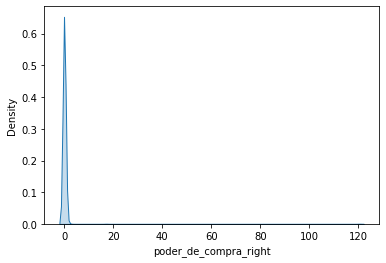

In [29]:
sns.kdeplot(desk_df["poder_de_compra_right"], shade=True)

/tmp/ipykernel_3634/2805362168.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df["poder_de_compra_right"], shade=True)


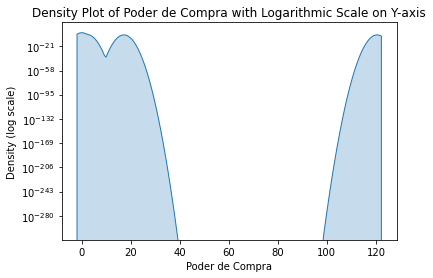

In [28]:
plot_log(desk_df)

In [36]:
assembly_df = desk_df[desk_df["stacks_Assembly"] == True]

/tmp/ipykernel_3634/2620122126.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(assembly_df["poder_de_compra_right"], shade=True)


<AxesSubplot:xlabel='poder_de_compra_right', ylabel='Density'>

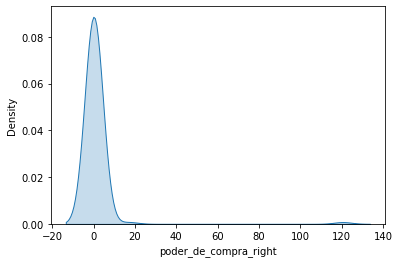

In [37]:
sns.kdeplot(assembly_df["poder_de_compra_right"], shade=True)

/tmp/ipykernel_3634/2805362168.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df["poder_de_compra_right"], shade=True)


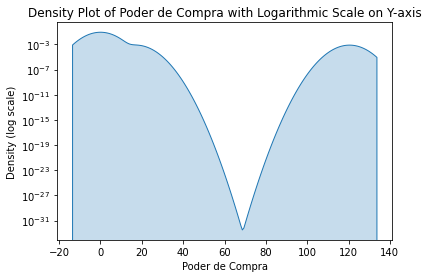

In [38]:
plot_log(assembly_df)

/tmp/ipykernel_3634/2805362168.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df["poder_de_compra_right"], shade=True)


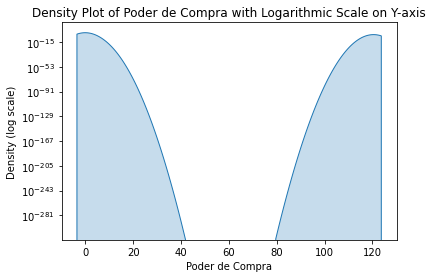

In [50]:
fraco_df = desk_df[desk_df["stacks_JavaScript"] == True]
plot_log(fraco_df)

/tmp/ipykernel_3634/4265015947.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraco_df["poder_de_compra_right"], shade=True)


<AxesSubplot:xlabel='poder_de_compra_right', ylabel='Density'>

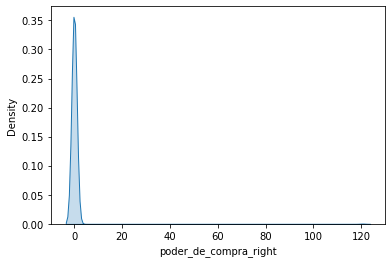

In [51]:
sns.kdeplot(fraco_df["poder_de_compra_right"], shade=True)

/tmp/ipykernel_3634/2524221735.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(desk_df[["stacks_Assembly", "stacks_C#", "poder_de_compra_right"]], shade=True)


<AxesSubplot:ylabel='Density'>

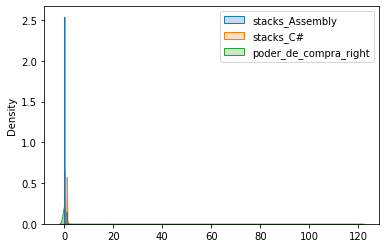

In [57]:
desk_df = merged_df[merged_df["FinalDevType"].str.contains("desktop")]
sns.kdeplot(desk_df[["stacks_Assembly", "stacks_C#", "poder_de_compra_right"]], shade=True)

In [99]:
def plot_density_curves(df, numeric_col, nominal_cols):
    """
    Plots density curves for a numeric column based on different categories in a list of nominal columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    numeric_col (str): The name of the numeric column.
    nominal_cols (list): A list of nominal columns to group by and plot density curves for.
    """
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 6))
    
    # Loop through the list of nominal columns
    for col in nominal_cols:
        # Check if the column exists in the DataFrame
        if col in df.columns:
            # Filter the DataFrame for the current category
            subset = df[df[col] == True]
            # Plot the density curve for the numeric column
            # ax = sns.kdeplot(subset[numeric_col], label=f'{col}: {True}', shade=True)
            # ax.set_yscale('log')
            
            plt.hist(subset[numeric_col], bins=50,label=f'{col}: {True}', alpha=0.5, log=True)

    # # Add labels and title
    # plt.xlabel('Poder de Compra')
    # plt.ylabel('Density (log scale)')
    # plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

    # # Show the plot
    # plt.show()
    
    # Add plot title and labels
    plt.title(f'Density Curves for {numeric_col} by Categories in Nominal Columns')
    plt.xlabel(numeric_col)
    plt.ylabel('Density')
    
    # Display legend
    plt.legend()
    
    # Show plot
    plt.show()

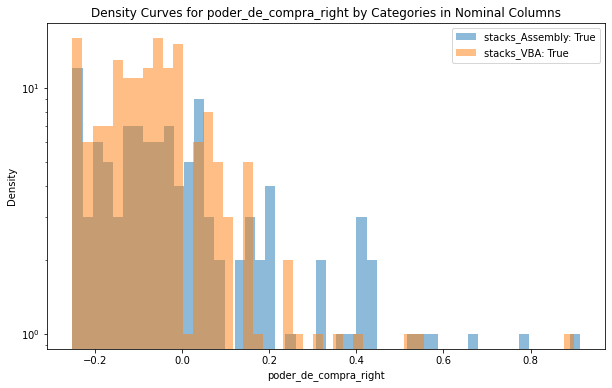

In [100]:
nominal_columns = ['stacks_Assembly', 'stacks_VBA']
plot_density_curves(desk_df[desk_df['poder_de_compra_right']<4], 'poder_de_compra_right', nominal_columns)

### Analise correlacao

In [178]:
corr_df = df[["Age", "EdLevel", "RemoteWork", "YearsCode", "YearsCodePro", "DevType", "OrgSize", "ConvertedCompYearly", "Country"]]

AAA = ['Less than 1 year', 'More than 50 years']

def fun(row):
    years = row["YearsCodePro"]
    if years == 'Less than 1 year':
        years = '1'
    elif years == 'More than 50 years':
        years = '50'
    return int(years)

# 
corr_df = corr_df[corr_df["Country"].isin(TOP10_COUNTRIES)]
corr_df = corr_df.dropna(subset=["ConvertedCompYearly", "Age", "YearsCodePro"])
corr_df["poder_de_compra"] = corr_df.apply(obtem_poder_de_compra,axis=1)
corr_df = corr_df[corr_df["poder_de_compra"] < 1000000]
corr_df = corr_df[["Age", "YearsCode", "YearsCodePro", "poder_de_compra"]]
corr_df = corr_df[corr_df["Age"] != "Prefer not to say"]
corr_df["YearsCodePro"] = corr_df.apply(fun, axis=1)
corr_df

,Age,YearsCode,YearsCodePro,poder_de_compra
1,25-34 years old,18,9,398145.000000
2,45-54 years old,27,23,349250.000000
3,25-34 years old,12,7,217932.000000
5,35-44 years old,21,21,206229.188060
6,35-44 years old,4,3,188595.000000
...,...,...,...,...
89158,25-34 years old,11,8,8311.355464
89162,35-44 years old,30,24,44462.270902
89167,18-24 years old,6,2,1689.717507
89170,25-34 years old,18,9,118917.850746


In [180]:
corr_df["YearsCodePro"].unique()

array([ 9, 23,  7, 21,  3, 15,  1, 10,  2,  6, 14,  5, 19, 13, 16, 28, 30,
        8, 24, 40, 17,  4, 25, 12, 20, 11, 18, 50, 27, 43, 26, 38, 33, 29,
       22, 35, 31, 34, 37, 42, 36, 39, 41, 32, 44, 48, 45, 46, 47, 49])

In [179]:
from math import isnan

def fun(row):
    a =age_mapping[row["Age"]]
    if isnan(a) == True:
        b = 0
    return a


age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', 
    '35-44 years old', '45-54 years old', '55-64 years old', 
    '65 years or older', 'Prefer not to say'
]
age_mapping = {age: idx for idx, age in enumerate(age_order)}
corr_df['Age'] = corr_df['Age'].map(age_mapping)
corr_df

,Age,YearsCode,YearsCodePro,poder_de_compra
1,2,18,9,398145.000000
2,4,27,23,349250.000000
3,2,12,7,217932.000000
5,3,21,21,206229.188060
6,3,4,3,188595.000000
...,...,...,...,...
89158,2,11,8,8311.355464
89162,3,30,24,44462.270902
89167,1,6,2,1689.717507
89170,2,18,9,118917.850746


In [171]:
corr_df["YearsCode"].unique()

array([18, 27, 12, 21,  4,  5, 20, 10, 15, 11, 24,  6, 13,  1,  3, 16, 33,
       32, 35,  7, 29, 19, 50, 22, 26, 34, 14,  8,  9, 23, 30, 40, 25,  2,
       45, 31, 43, 17, 28, 41, 39, 42, 37, 38, 44, 46, 48, 36, 49, 47])

In [172]:
corr_df.corr()

/tmp/ipykernel_2144/3338937161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df.corr()


,Age,YearsCode,poder_de_compra
Age,1.000000,0.789665,0.231886
YearsCode,0.789665,1.000000,0.269667
poder_de_compra,0.231886,0.269667,1.000000


In [181]:
correlations = corr_df.corr()['poder_de_compra'].drop('poder_de_compra')

/tmp/ipykernel_2144/1007889377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = corr_df.corr()['poder_de_compra'].drop('poder_de_compra')


In [182]:
correlation_df = correlations.reset_index().rename(columns={'index': 'Column', 'poder_de_compra': 'Correlation'})
correlation_df

,Column,Correlation
0,Age,0.232561
1,YearsCodePro,0.270807


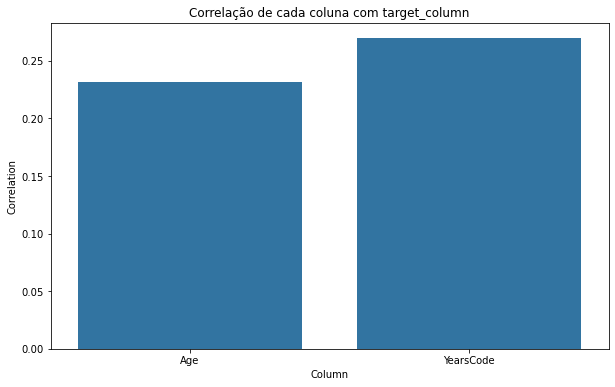

In [175]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Correlation', data=correlation_df)
plt.title('Correlação de cada coluna com target_column')
plt.show()